<a href="https://colab.research.google.com/github/talhadbs/ProgrammingforDataAnalyticsCA02/blob/main/Copy_of_TalhaProgrammingCA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Acquisition (data_acquisition.ipynb)**

In this phase, the objective is to retrieve data from the OpenWeatherMap API for a given city (in our case, **Ireland**) and save it in a CSV format.

**Steps**:

1.   **Import necessary libraries:**
        *     **requests**: Used to make HTTP requests to the OpenWeatherMap API.
        *    **pandas**: A data manipulation library to handle and save the acquired data.

2.   **API Key and Target Cities:**
        *     **api_key**: This is a unique key provided by OpenWeatherMap to authenticate API requests.
        *    **cities**: A list of cities for which we are fetching the weather data.
3.   **Build and Make the API Call:**
    *   For each city in the cities list:
        *     Construct the **base_url** to make the API call.
        *   Send a GET request to the OpenWeatherMap API using the **requests.get()** method.
4.  **Check API Response:**
      *   Ensure that the API response is successful (**status_code == 200**). If not, print an error message.

5.   **Parse and Extract Data:**
        *     Convert the API response into JSON format using **response.json().**
        *    Extract the 'main' section from the JSON response, which contains the primary weather details like temperature, humidity, etc.

6.   **Data Conversion and Storage:**
        *     Convert the extracted weather data into a Pandas DataFrame.
        *    Save this DataFrame to a CSV file named weather_data.csv.

7.   **Extract weather details:**
       
       Extract the 'main' section from the JSON data, which contains core weather details.

8.   **Convert temperature to Celsius:**

        OpenWeatherMap provides temperature in Kelvin by default. Convert this to Celsius for better understanding and consistency.
9.   **Filter out invalid temperature data:**
       
       Given the range of typical temperatures on Earth, filter out records with temperatures that fall outside a valid range. For our purposes, this range is between -100°C and 60°C.

10.   **Convert the extracted data into a Pandas DataFrame.**

11.   **Save the DataFrame:**

      Store the processed DataFrame in a weather_data.csv file for further use.



In [ ]:
import requests
import pandas as pd

api_key = "0b5e97d969ebe3255a17d2af74331092"
cities = [
    "Dublin", "Cork", "Sligo", "New York", "Bray",
    "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia",
    "San Antonio", "San Diego", "Dallas", "San Jose", "Austin",
    "Jacksonville", "Fort Worth", "Columbus", "Charlotte", "San Francisco",
    "Indianapolis", "Seattle", "Denver", "Washington", "Boston",
    "El Paso", "Nashville", "Detroit", "Oklahoma City", "Portland",
    "Memphis", "Las Vegas", "Louisville", "Baltimore", "Milwaukee",
    "Albuquerque", "Tucson", "Fresno", "Mesa", "Sacramento",
    "Atlanta", "Kansas City", "Colorado Springs", "Miami", "Raleigh",
    "Omaha", "Oakland", "Minneapolis", "Tulsa", "Wichita",
    "Pittsburgh", "Long Beach", "Mesa", "Virginia Beach", "Bakersfield",
    "Cincinnati", "St. Louis", "Oakland", "Tampa", "New Orleans",
    "Portland", "Denver", "Oklahoma City", "Charlotte", "San Antonio",
    "San Diego", "Austin", "Louisville", "Milwaukee", "Indianapolis",
    "Seattle", "San Francisco", "Columbus", "Nashville", "Memphis",
    "Las Vegas", "Baltimore", "Kansas City", "Phoenix", "Pittsburgh",
    "Miami", "Washington", "El Paso", "Denver", "Oklahoma City",
    "Long Beach", "Mesa", "Virginia Beach", "Bakersfield",
    "Cape Town", "Johannesburg", "Durban", "Pretoria", "Port Elizabeth",
    "Cairo", "Alexandria", "Giza", "Suez", "Port Said",
    "London", "Manchester", "Birmingham", "Liverpool", "Leeds",
    "Paris", "Lyon", "Marseille", "Toulouse", "Nice",
    "Berlin", "Hamburg", "Munich", "Frankfurt", "Cologne",
    "Rome", "Milan", "Naples", "Turin", "Palermo",
    "Madrid", "Barcelona", "Valencia", "Sevilla", "Zaragoza",
    "Beijing", "Shanghai", "Guangzhou", "Shenzhen", "Tianjin",
    "Tokyo", "Osaka", "Nagoya", "Kyoto", "Fukuoka",
    "New Delhi", "Mumbai", "Kolkata", "Chennai", "Bangalore",
    "Seoul", "Busan", "Incheon", "Daegu", "Gwangju",
    "Mexico City", "Guadalajara", "Monterrey", "Puebla", "Toluca",
    "São Paulo", "Rio de Janeiro", "Salvador", "Belo Horizonte", "Fortaleza",
    "Buenos Aires", "Córdoba", "Rosario", "La Plata", "Santa Fe",
]


data_list = []

for city in cities:
    base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    response = requests.get(base_url)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()

        # Check if 'main' exists in data
        if 'main' in data:
            data_list.append(data['main'])
        else:
            print(f"No weather data found for {city}.")
    else:
        print(f"API request failed for {city} with status code: {response.status_code}")

# Convert the weather data to a pandas DataFrame and save it to a CSV file
df = pd.DataFrame(data_list)

# Convert temperature from Kelvin to Celsius
df['temp'] = df['temp'] - 273.15  # Convert Kelvin to Celsius

# Filter the data based on valid temperature range
valid_temp_range = (-100, 60)  # In Celsius
df = df[df['temp'].between(valid_temp_range[0], valid_temp_range[1])]

df.to_csv('weather_data.csv', index=False)




**Data Pre-processing (data_preprocessing.ipynb)**

In this phase, the raw data acquired from the API is cleaned and transformed to make it suitable for analysis.

**Steps**:


1.   Load the raw data from **weather_data.csv** using Pandas.

2.   Check and handle missing values, if any. In our example, we simply drop rows with any missing values.
3.   Convert the temperature data from Kelvin to Celsius.
4.   Save the cleaned and transformed data to **preprocessed_weather_data.csv**.





In [ ]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('weather_data.csv')

# Handle missing values (if any)
df = df.dropna()

# Convert temperature from Kelvin to Celsius
df['temp'] = df['temp'] - 273.15

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_weather_data.csv', index=False)


**Data Analysis (data_analysis.ipynb)**

In this phase, we perform exploratory data analysis (EDA) to understand our dataset's characteristics and derive insights.

**Steps**:



1.   Load the preprocessed data from preprocessed_weather_data.csv using Pandas.
2.   Calculate basic statistical measures for the temperature:
        *   Mean: Average temperature.
        *   Median: Middle value in the sorted list of temperatures.
        *   Standard Deviation: Measures the amount of variation or dispersion of the temperature set.

3.   Print out the statistical measures.
4.   Visualize the temperature distribution using a histogram. This gives an idea about the frequency distribution of the temperature values.




Mean temperature: -248.06 °C
Median temperature: -247.20 °C
Standard deviation of temperature: 7.57 °C


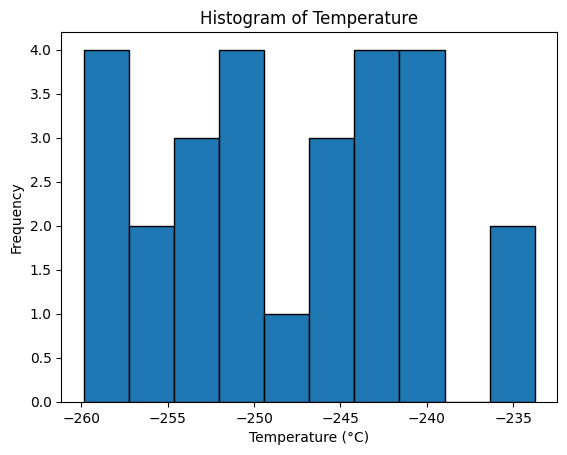

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data from the CSV file
df = pd.read_csv('preprocessed_weather_data.csv')

# Calculate basic statistics for the temperature
mean_temp = df['temp'].mean()
median_temp = df['temp'].median()
std_dev_temp = df['temp'].std()

# Print the statistics
print(f'Mean temperature: {mean_temp:.2f} °C')
print(f'Median temperature: {median_temp:.2f} °C')
print(f'Standard deviation of temperature: {std_dev_temp:.2f} °C')

# Plot a histogram of the temperature
plt.hist(df['temp'], bins=10, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()
